In [1]:
#%matplotlib
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#Se realizará el anaisis en tres espacios de color diferente
img3 = cv2.imread('C:/Users/leand/Documents/LEANDRO/UBA/CEIA/III/CV/CV_TPS/TP1/Material_TPs/TP1/segmentacion.png')
img_rgb = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img3, cv2.COLOR_BGR2HSV)
img_yuv = cv2.cvtColor(img3, cv2.COLOR_BGR2YUV)

# Análisis de histograma RGB
- Se Observa que el canal rojo es quien tiene mayores picos en valores cercano a cero, a su vez tiene una distribución, más uniforme. A priori podemos deducir que esa ausencia se presenta en ciertos sectores del cielo y el agua; la uniformidad se presenta en la región de tierra.

- El canal azul tiene un pico de intensidad de cero o cercano a cero en ciertas regiones Y podemos deducir que estos picos de baja intensidad se presentan en la tierra. Pasa a tener una distribución pareja entre 25-180 de intensidad que podría estar en el agua, y las mayores concentraciones están en el cielo.

- el canal Green se ve que tiene una distribución pareja en todos los segmentos, considero que esto puede representar un problema para segmentar las tres diferentes partes de la imagen

In [25]:
# Calcular el histograma de RGB
def hist_por_canal(image,esp:str):
    hist_1 = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist_2 = cv2.calcHist([image], [1], None, [256], [0, 256])
    hist_3 = cv2.calcHist([image], [2], None, [256], [0, 256])
    # Graficar histograma
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))

    fig.subplots_adjust(hspace=0.5)

    axs[0,0].set_title(f"Histograma de los tres canales {esp}")
    axs[0,0].set_xlabel("Intensidad de pixel")
    axs[0,0].set_ylabel("Cantidad de pixeles")
    axs[0,0].plot(hist_1, color='red')
    axs[0,0].plot(hist_2, color='green')
    axs[0,0].plot(hist_3, color='blue')
    axs[0,0].set_xlim([0, 256])

    if esp=='RGB':
        img_1 = np.zeros_like(image)
        img_1[:,:,0] = image[:,:,0]

        img_2 = np.zeros_like(image)
        img_2[:,:,1] = image[:,:,1]

        img_3 = np.zeros_like(image)
        img_3[:,:,2] = image[:,:,2]

        axs[0,1].set_title(f"Primer Canal {esp[0]}")
        axs[0,1].imshow(img_1)
        axs[1,0].set_title(f"Segundo Canal {esp[1]}")
        axs[1,0].imshow(img_2)
        axs[1,1].set_title(f"Tercer Canal {esp[2]}")
        axs[1,1].imshow(img_3)
        plt.show(block=False)
    else:
        axs[0,1].set_title(f"Primer Canal {esp[0]}")
        axs[0,1].imshow(image[:,:,0])
        axs[1,0].set_title(f"Segundo Canal {esp[1]}")
        axs[1,0].imshow(image[:,:,1])
        axs[1,1].set_title(f"Tercer Canal {esp[2]}")
        axs[1,1].imshow(image[:,:,2])
        plt.show(block=False)



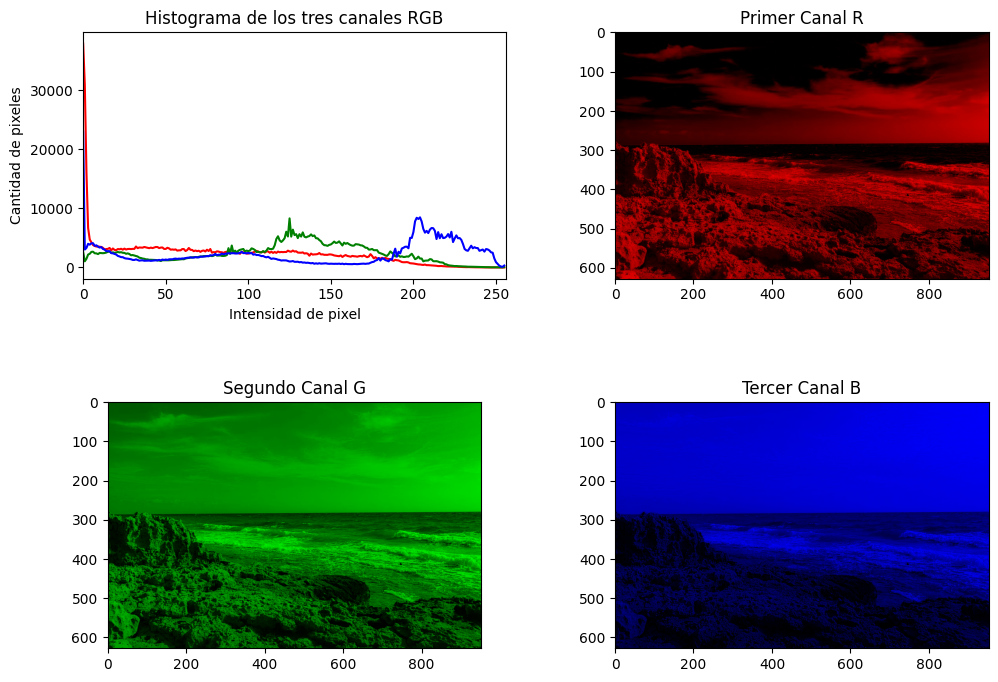

In [23]:
hist_por_canal(img_rgb,'RGB')

# Análisis de histograma HSV
1. Una de las grandes conclusiones que podemos a priori indicar de el análisis en el espacio HSV, es que los tres canales tienen límites bien diferenciados:
- H: tiene niveles de intensidad bajos claramente diferenciados en la costa y tierra, con el Mar y cielo.
- S: Agrega valor para segmentar el cielo y la espuma de las olas por su intensidad elevada
- V: es ek qye menos información nos puede entregar, sin embargo puede entregar información de aquellos sectores del cielo que están más nublados

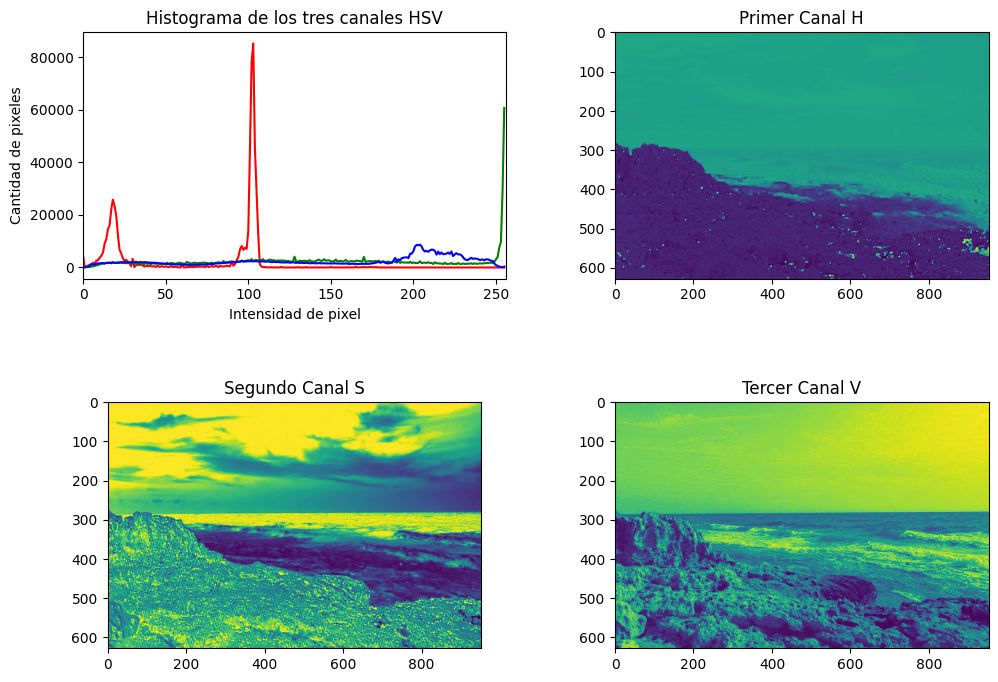

In [26]:
hist_por_canal(img_hsv,'HSV')

# Análisis de histograma YUV
Los limites de la distribución en cada uno de los canales en YUV no están claramente limitados, por lo cual se descarta este espacio de color para la segmentación

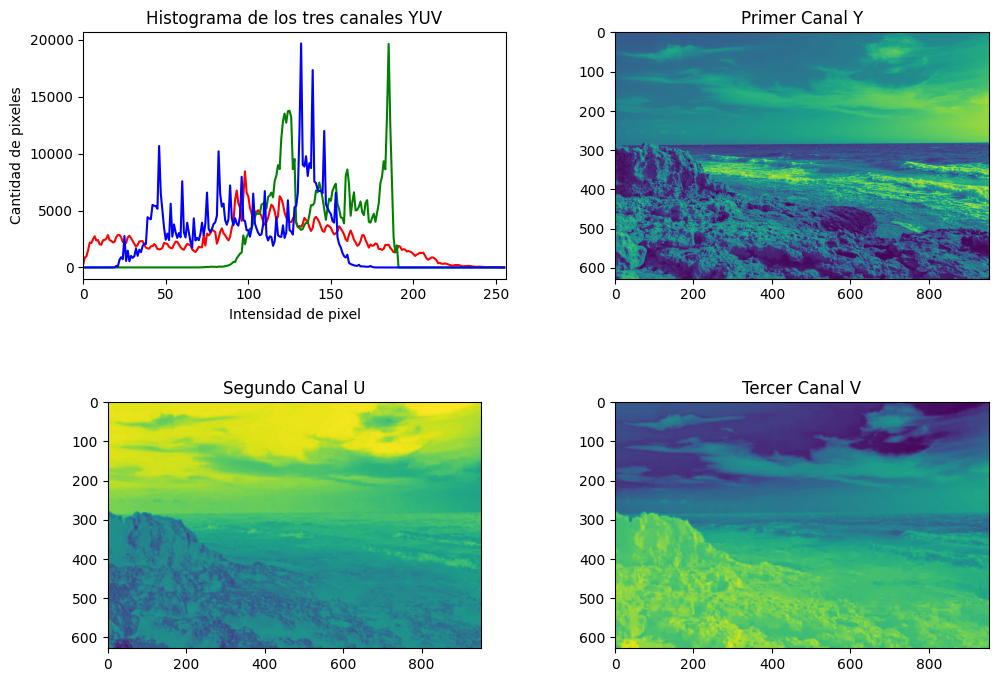

In [27]:
hist_por_canal(img_yuv,'YUV')